 # Preprocessing and visualization

In [ ]:
from IPython.display import clear_output

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/housePrice.csv")
print(len(df))

3479


In [ ]:
import json
f = open('data/loc.json')
json_data = json.load(f)

In [ ]:
df["Room"].unique()

array([1, 2, 3, 0, 4, 5])

In [ ]:
latitude_list,  longitude_list = np.zeros(3479), np.zeros(3479) 

In [ ]:
for i in range(len(json_data)):
    for j in df.index[df['Address'] == json_data[i]['city']].tolist():
        latitude_list[j] = json_data[i]['lat']
        longitude_list[j] = json_data[i]['lng']

In [ ]:
len(latitude_list)

3479

In [ ]:
df['Latitude'] = latitude_list

In [ ]:
df['Longitude'] =    longitude_list

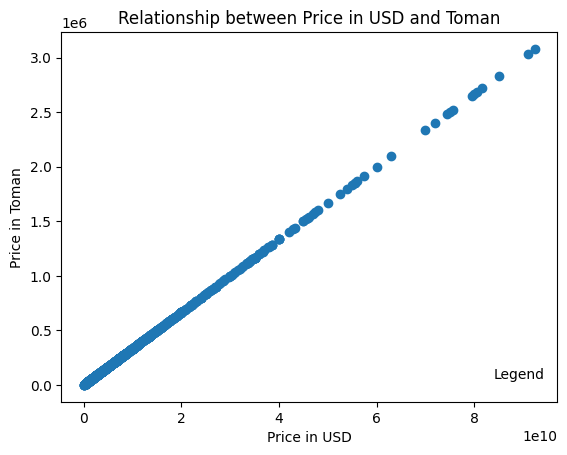

In [ ]:
import matplotlib.pyplot as plt
f=plt.figure()
plt.scatter(df['Price'], df["Price(USD)"])
plt.xlabel('Price in USD')
plt.ylabel('Price in Toman')
plt.title('Relationship between Price in USD and Toman');
ax_area = plt.legend(loc=4, frameon=False, title='Legend');

In [ ]:
df = df.drop(["Address",  "Price(USD)"],axis= 1)

In [ ]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Latitude,Longitude
0,63,1,True,True,True,1.850000e+09,35.673704,51.520322
1,60,1,True,True,True,1.850000e+09,35.673704,51.520322
2,79,2,True,True,True,5.500000e+08,35.737123,51.817215
3,95,2,True,True,True,9.025000e+08,35.774916,51.310269
4,123,2,True,True,True,7.000000e+09,36.060000,14.208890


In [ ]:
# area_stripped = [' '] * 3479
# j=0
# for i in df['Area']:
#     area_stripped[j] = i.strip(' ')
#     j=j+1

In [ ]:
df['Area'] = df['Area'].str.strip(' ')
df['Area'] = df['Area'].str.replace(',', '')

In [ ]:
df['Area'] = df['Area'].astype('float')
df.dropna()

,Area,Room,Parking,Warehouse,Elevator,Price,Latitude,Longitude
0,63.0,1,True,True,True,1.850000e+09,35.673704,51.520322
1,60.0,1,True,True,True,1.850000e+09,35.673704,51.520322
2,79.0,2,True,True,True,5.500000e+08,35.737123,51.817215
3,95.0,2,True,True,True,9.025000e+08,35.774916,51.310269
4,123.0,2,True,True,True,7.000000e+09,36.060000,14.208890
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,3.500000e+09,0.000000,0.000000
3475,83.0,2,True,True,True,6.800000e+09,35.816056,51.470947
3476,75.0,2,False,False,False,3.650000e+08,35.477882,50.946919
3477,105.0,2,True,True,True,5.600000e+09,0.000000,0.000000


In [ ]:
df.dtypes

Area         float64
Room           int64
Parking         bool
Warehouse       bool
Elevator        bool
Price        float64
Latitude     float64
Longitude    float64
dtype: object

<Axes: >

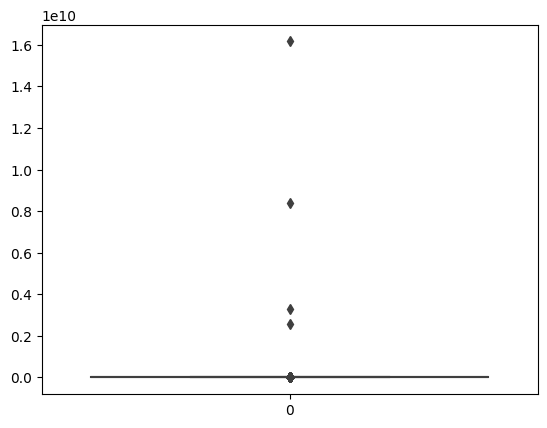

In [ ]:
import seaborn as sns
sns.boxplot(df['Area'])

In [ ]:
area_outs= np.where(df['Area'] > 3500)
print(area_outs)

(array([ 570,  709, 1604, 2171, 2802]),)


In [ ]:
df.drop(area_outs[0], axis=0, inplace=True)

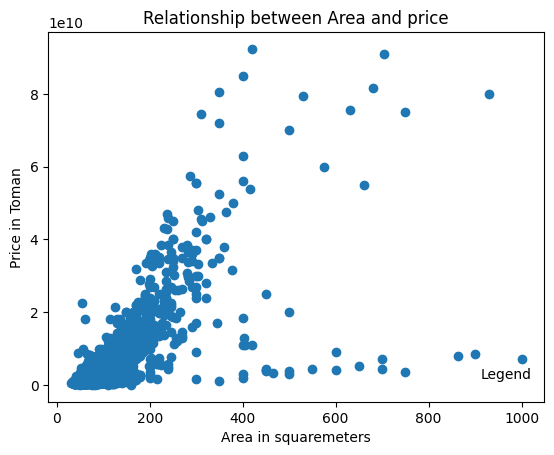

In [ ]:
import matplotlib.pyplot as plt
y_col = 'Price'
y = df[y_col]
X = df[df.columns.drop(y_col)]

f=plt.figure()
plt.scatter(X['Area'], y)
plt.xlabel('Area in squaremeters')
plt.ylabel('Price in Toman')
plt.title('Relationship between Area and price');
ax_area = plt.legend(loc=4, frameon=False, title='Legend');

<Axes: >

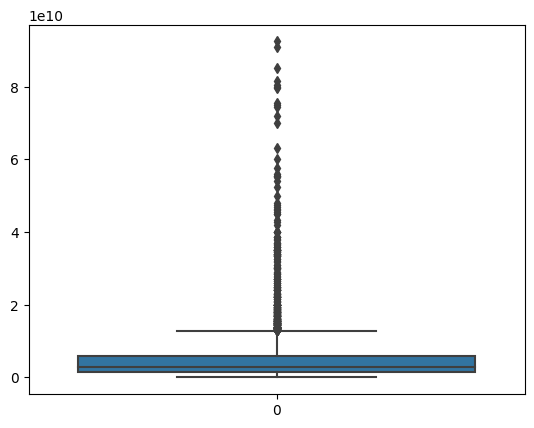

In [ ]:
sns.boxplot(df['Price'])

In [ ]:
import logging, sys
logging.disable(sys.maxsize)

Q1 = np.percentile(df['Price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
price_outs= np.where(df['Price'] >4*1e10)
print(len(price_outs[0]))
print(1.5*IQR)
print(4.2*1e10 - 1.5*IQR)

33
6875625000.0
35124375000.0


<ipython-input-22-35b73cc88745>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Price'], 25,
<ipython-input-22-35b73cc88745>:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Price'], 75,


In [ ]:
df.drop(price_outs[0], axis=0, inplace=True)

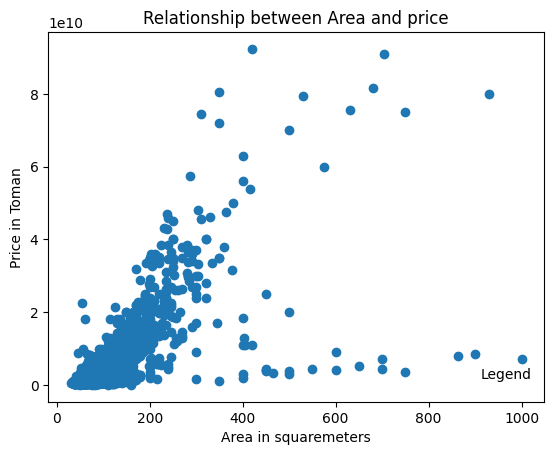

In [ ]:
import matplotlib.pyplot as plt
y_col = 'Price'
y = df[y_col]
X = df[df.columns.drop(y_col)]

f=plt.figure()
plt.scatter(X['Area'], y)
plt.xlabel('Area in squaremeters')
plt.ylabel('Price in Toman')
plt.title('Relationship between Area and price');
ax_area = plt.legend(loc=4, frameon=False, title='Legend');

In [ ]:
df= df.dropna()
df = df.reset_index()
df.drop(["index"], axis =1, inplace=True)

In [ ]:
df

,Area,Room,Parking,Warehouse,Elevator,Price,Latitude,Longitude
0,63.0,1,True,True,True,1.850000e+09,35.673704,51.520322
1,60.0,1,True,True,True,1.850000e+09,35.673704,51.520322
2,79.0,2,True,True,True,5.500000e+08,35.737123,51.817215
3,95.0,2,True,True,True,9.025000e+08,35.774916,51.310269
4,123.0,2,True,True,True,7.000000e+09,36.060000,14.208890
...,...,...,...,...,...,...,...,...
3436,86.0,2,True,True,True,3.500000e+09,0.000000,0.000000
3437,83.0,2,True,True,True,6.800000e+09,35.816056,51.470947
3438,75.0,2,False,False,False,3.650000e+08,35.477882,50.946919
3439,105.0,2,True,True,True,5.600000e+09,0.000000,0.000000


In [ ]:
df.to_csv('preprocessed_df.csv')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
xdata = df['Longitude']
ydata = df['Latitude']
zdata = df['Price']

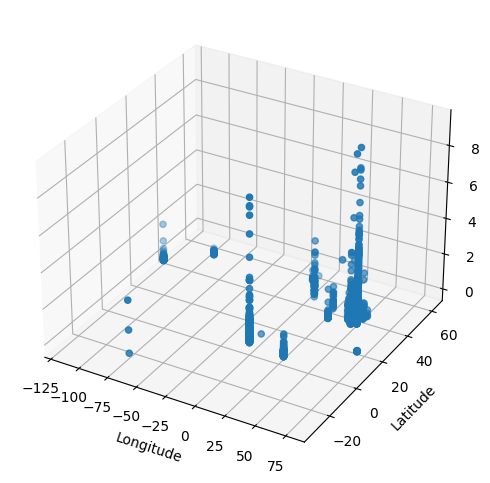

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.scatter3D(xdata, ydata, zdata)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')
plt.savefig('3d_scatter.png', dpi = 300);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/a

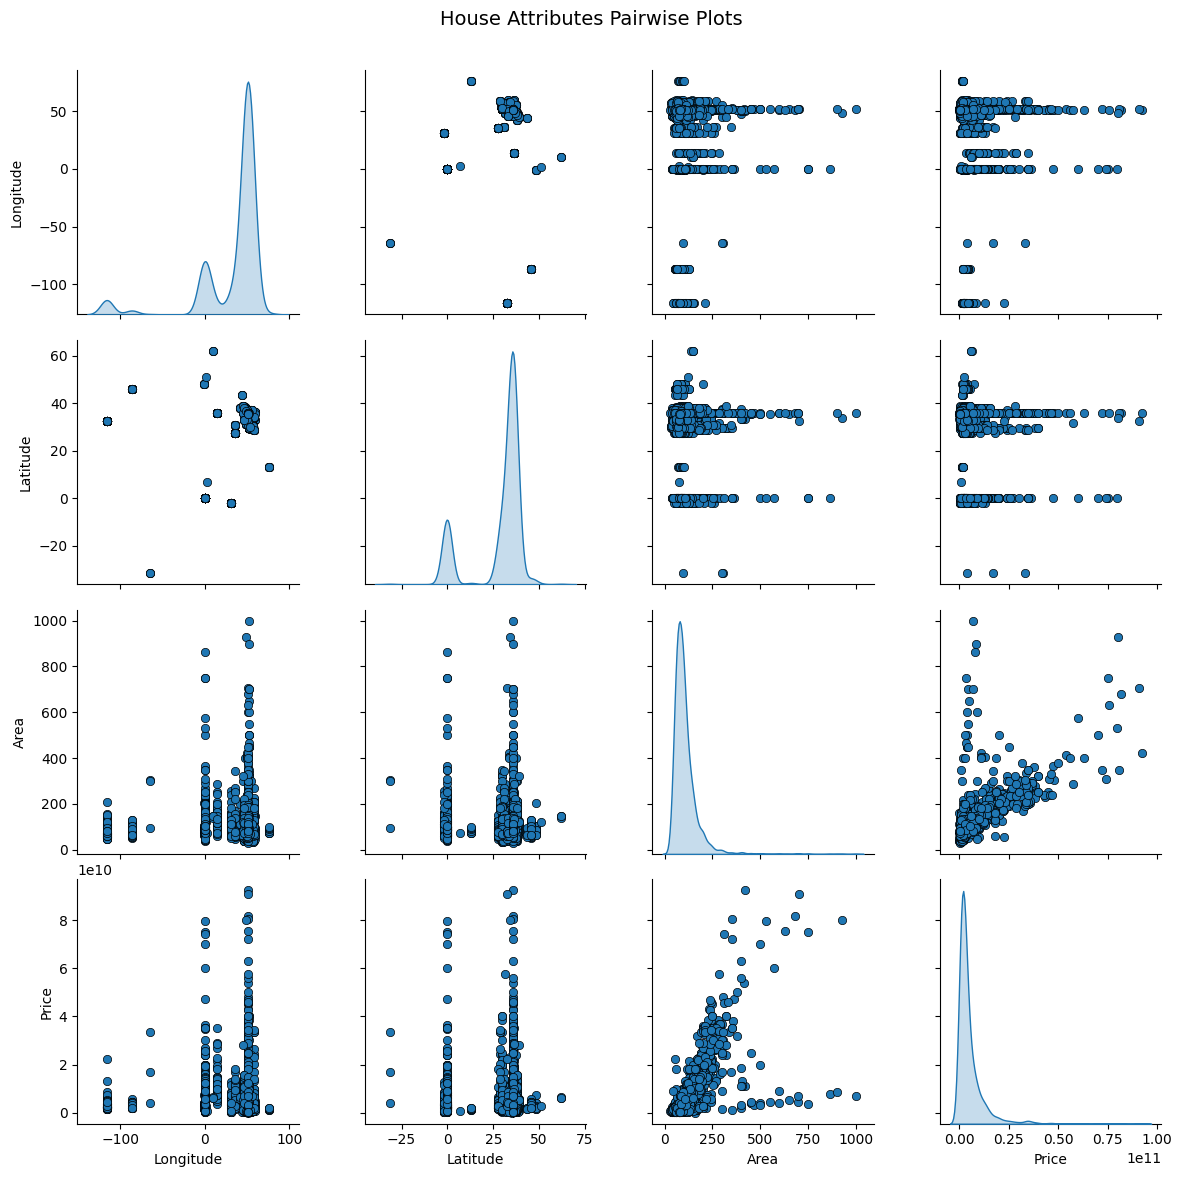

In [ ]:
cols = ['Longitude', 'Latitude', 'Area', 'Price']
pp = sns.pairplot(df[cols], size=3, aspect=1,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('House Attributes Pairwise Plots', fontsize=14)

In [ ]:
df.describe()

,Area,Room,Price,Latitude,Longitude
count,3441.000000,3441.000000,3.441000e+03,3441.000000,3441.000000
mean,106.524847,2.075559,5.263766e+09,28.434003,32.954691
std,70.021986,0.756052,7.786246e+09,13.763842,39.091523
min,30.000000,0.000000,3.600000e+06,-31.411430,-116.273630
25%,68.000000,2.000000,1.420000e+09,29.497246,31.250000
50%,90.000000,2.000000,2.870000e+09,35.547851,51.304211
75%,120.000000,2.000000,6.000000e+09,35.772042,51.473187
max,1000.000000,5.000000,9.240000e+10,62.000000,76.096200


In [ ]:
df.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Price        0
Latitude     0
Longitude    0
dtype: int64

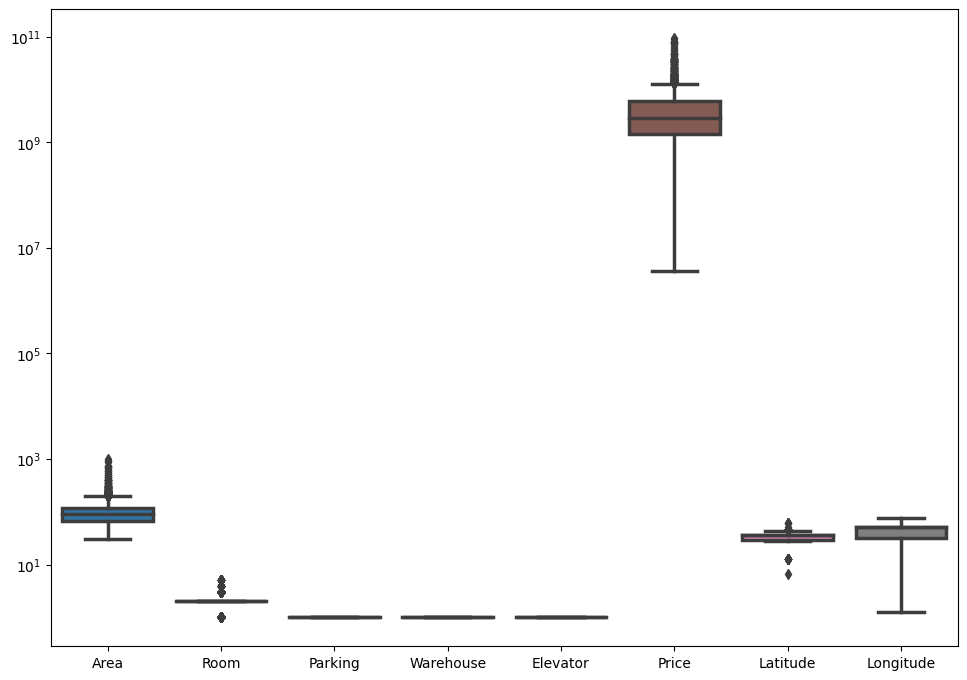

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


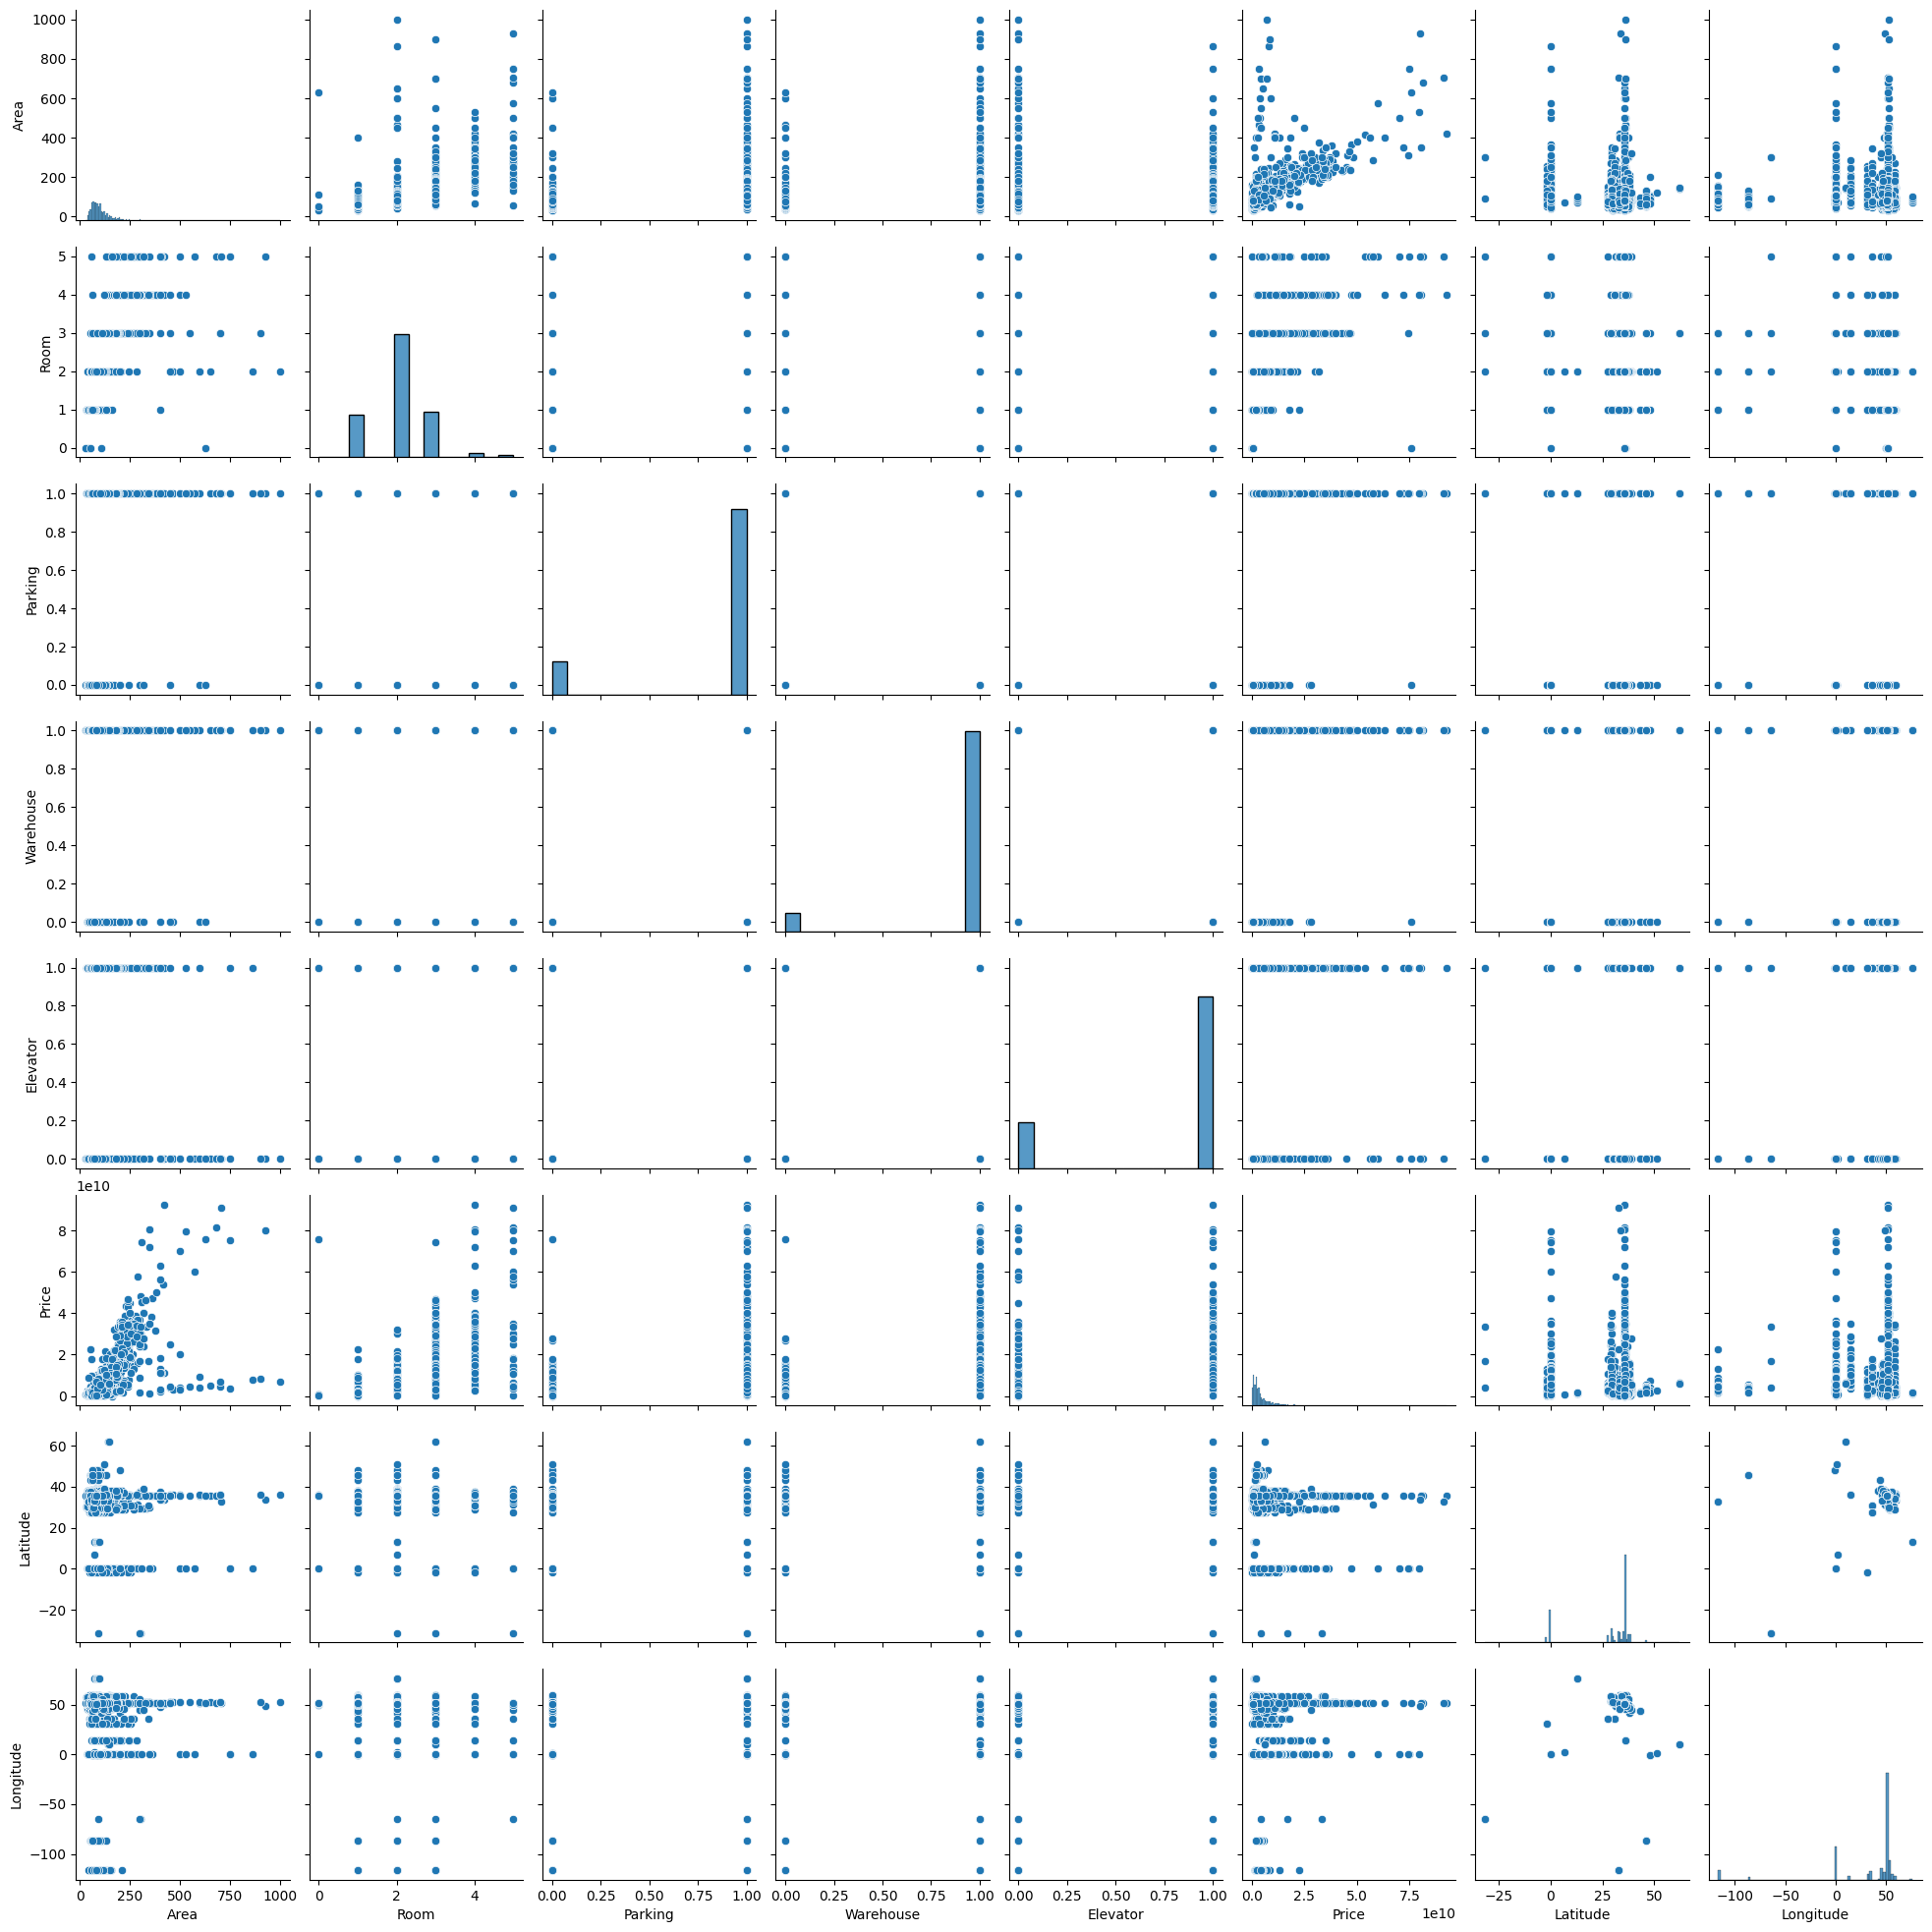

In [ ]:
sns.pairplot(df)

In [ ]:
relation =df.corr()
relation_index=relation.index

<Axes: >

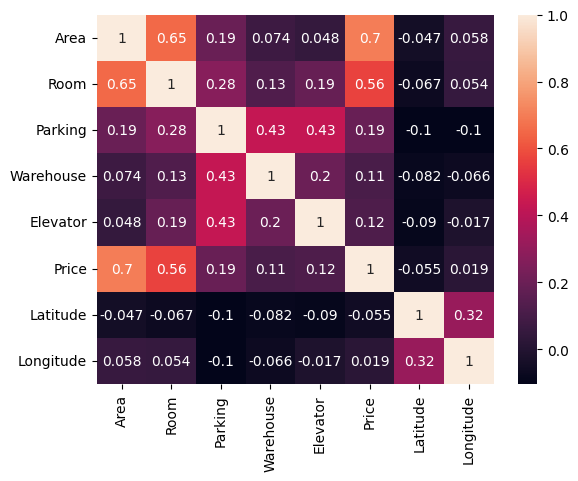

In [ ]:
sns.heatmap(df[relation_index].corr(),annot=True)

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) # split the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model
y_test_pred = regressor.predict(X_test)

<ipython-input-38-b08b980e3126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_test_pred)


<Axes: xlabel='Price', ylabel='Density'>

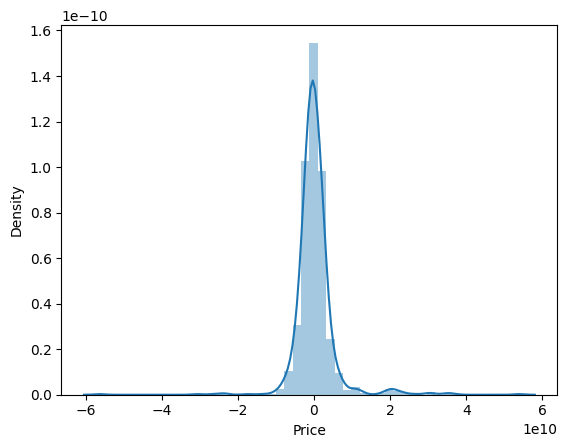

In [ ]:
sns.distplot(y_test-y_test_pred)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 2853217587.57
Mean squared error = 3.0358853027861082e+19
Median absolute error = 1657705882.45
Explain variance score = 0.5
R2 score = 0.5


# Gradient Boosting Regression

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBR = GradientBoostingRegressor()


parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
clear_output(wait=True)
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)




GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

CVtuned_GBR = GradientBoostingRegressor(learning_rate = 0.03, max_depth = 6, n_estimators = 100, subsample = 0.1)

CVtuned_GBR.fit(X_train, y_train)

CVtuned_GBR_pred = CVtuned_GBR.predict(X_test)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, subsample=0.5)

 The best score across ALL searched params:
 0.6945930819108665

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.5}


<ipython-input-43-f193c7954647>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-CVtuned_GBR_pred)


<Axes: xlabel='Price', ylabel='Density'>

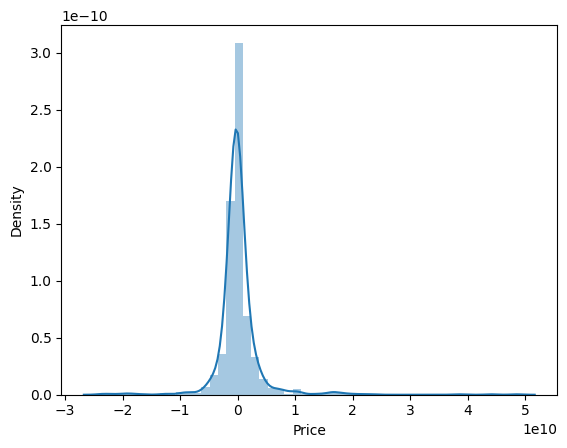

In [ ]:
sns.distplot(y_test-CVtuned_GBR_pred)

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, CVtuned_GBR_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, CVtuned_GBR_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, CVtuned_GBR_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, CVtuned_GBR_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, CVtuned_GBR_pred), 2))

Mean absolute error = 1847184299.21
Mean squared error = 1.736066767490709e+19
Median absolute error = 807307243.54
Explain variance score = 0.71
R2 score = 0.71


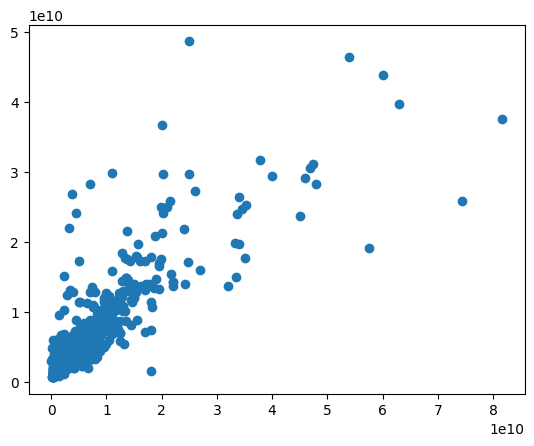

In [ ]:
plt.scatter(y_test,CVtuned_GBR_pred)


In [ ]:
from sklearn.linear_model import Lasso, Ridge, LassoCV,LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Ridge

In [ ]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['max_iter'] = [5000, 10000]
clear_output(wait=True)
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
result = search.fit(X_train, y_train)


In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -2749955782.7205186
Best Hyperparameters: {'alpha': 83.56561666138202, 'fit_intercept': True, 'max_iter': 10000, 'solver': 'sag'}


In [ ]:
rand_tuned_ridge= Ridge(alpha = 83.56561666138202, fit_intercept = True,  max_iter = 10000, solver = 'sag')


In [ ]:
rand_tuned_ridge.fit(X_train,y_train)


Ridge(alpha=83.56561666138202, max_iter=10000, solver='sag')

In [ ]:
rand_ridge_tuned_pred=rand_tuned_ridge.predict(X_test)

<ipython-input-52-d18665c344c5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-rand_ridge_tuned_pred)


<Axes: xlabel='Price', ylabel='Density'>

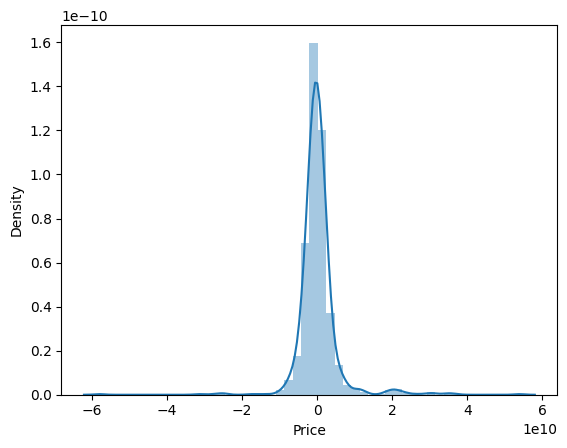

In [ ]:
sns.distplot(y_test-rand_ridge_tuned_pred)

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, rand_ridge_tuned_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, rand_ridge_tuned_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, rand_ridge_tuned_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, rand_ridge_tuned_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, rand_ridge_tuned_pred), 2))

Mean absolute error = 2796177112.97
Mean squared error = 3.0497786861826425e+19
Median absolute error = 1578895270.69
Explain variance score = 0.49
R2 score = 0.49


# Summary:
   we tried multiple linear and non-linear models in our code, such as linear regressor, Ridge, Decision tree, and GradientBoostingRegressor. We also tuned the parameters of all these models. As a result, the best performer was GradientBoostingRegressor and then Decision tree.

# The rest of the code will be continued in the next notebook

